In [1]:
import pandas as pd

In [2]:
scores_df = pd.read_csv("test.csv")
# Textra wrote out my scores as "me", let's get them back to "david"
scores_df.name = scores_df.name.replace(['me'],'david')

In [3]:
scores_df.name.value_counts()

doug      162
jamie     162
david     161
madre     161
lisa      156
daniel    147
Name: name, dtype: int64

In [83]:
jamie_scores_df = scores_df[scores_df.name == "jamie"]
daniel_scores_df = scores_df[scores_df.name == "daniel"]
david_scores_df = scores_df[scores_df.name == "david"]

In [89]:
david_scores_df.groupby("score").count()

,Unnamed: 0,puzzle_number,name
score,,,
2,6,6,6
3,58,58,58
4,61,61,61
5,29,29,29
6,4,4,4
X,3,3,3


In [115]:
counted_df = scores_df.groupby(["name", "score"]).count().reset_index()
counted_df = counted_df.rename(columns={"puzzle_number": "count"})

<AxesSubplot:xlabel='score', ylabel='count'>

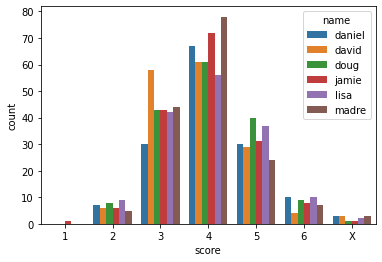

In [116]:
import seaborn as sns
sns.barplot(data=counted_df, x="score", y="count", hue="name", order=["1", "2", "3", "4", "5", "6", "X"])

In [61]:
jamies_puzzles = set(jamie_scores_df.puzzle_number.tolist())
davids_puzzles = set(david_scores_df.puzzle_number.tolist())
daniels_puzzles = set(daniel_scores_df.puzzle_number.tolist())

In [62]:
davids_puzzles.difference(jamies_puzzles)
davids_puzzles.difference(jamies_puzzles)

set()

In [63]:
jamies_puzzles.difference(daniels_puzzles)

{355, 363, 366, 397}

In [69]:
david_scores_df[david_scores_df == "<re.Match object; span=(9, 10), match='3'>"]

,Unnamed: 0,puzzle_number,score,name
4,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN
...,...,...,...,...
329,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN
343,NaN,NaN,NaN,NaN
346,NaN,NaN,NaN,NaN


In [72]:
scores_df.value_counts("score")

score
4                                             153
3                                              98
5                                              69
2                                              21
6                                              13
X                                               3
<re.Match object; span=(9, 10), match='3'>      2
<re.Match object; span=(9, 10), match='4'>      2
1                                               1
dtype: int64

In [73]:
scores_df[scores_df.score == "<re.Match object; span=(9, 10), match='3'>"]

,Unnamed: 0,puzzle_number,score,name
182,182,345,"<re.Match object; span=(9, 10), match='3'>",me
191,191,347,"<re.Match object; span=(9, 10), match='3'>",me
